<a href="https://colab.research.google.com/github/art-lmk/Clustering-FIFA-Players-using-KMeans/blob/main/Clustering_FIFA_players_using_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project,we are not trying to predict an outcome of a certain thing. We are clustering instances based on their similarity.

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
#load the dataset

df=pd.read_csv('players_22.csv')
df.head(10)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93.0,93.0,78000000.0,320000.0,34.0,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92.0,92.0,119500000.0,270000.0,32.0,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91.0,91.0,45000000.0,270000.0,36.0,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91.0,91.0,129000000.0,270000.0,29.0,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91.0,91.0,125500000.0,350000.0,30.0,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
5,200389,https://sofifa.com/player/200389/jan-oblak/220002,J. Oblak,Jan Oblak,GK,91.0,93.0,112000000.0,130000.0,28.0,...,33+3,33+3,33+3,32+3,89+3,https://cdn.sofifa.net/players/200/389/22_120.png,https://cdn.sofifa.net/teams/240/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/si.png
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91.0,95.0,194000000.0,230000.0,22.0,...,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
7,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90.0,90.0,13500000.0,86000.0,35.0,...,34+3,34+3,34+3,35+3,88+2,https://cdn.sofifa.net/players/167/495/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
8,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,GK,90.0,92.0,99000000.0,250000.0,29.0,...,33+3,33+3,33+3,31+3,88+3,https://cdn.sofifa.net/players/192/448/22_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/de.png
9,202126,https://sofifa.com/player/202126/harry-kane/22...,H. Kane,Harry Kane,ST,90.0,90.0,129500000.0,240000.0,27.0,...,61+3,61+3,61+3,64+3,20+3,https://cdn.sofifa.net/players/202/126/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png


Now, lets define the features we are going to use to cluster our players.
Our features are
1. Overall rating
2. Potential rating
3. Value_eur
4. Wage_eur
5.Age

In [3]:
features=['overall','potential','value_eur','wage_eur','age']
df.dropna(subset=features)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93.0,93.0,78000000.0,320000.0,34.0,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92.0,92.0,119500000.0,270000.0,32.0,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91.0,91.0,45000000.0,270000.0,36.0,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91.0,91.0,129000000.0,270000.0,29.0,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91.0,91.0,125500000.0,350000.0,30.0,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11692,241213,https://sofifa.com/player/241213/takuya-uchida...,T. Uchida,内田 拓哉,"LM, RB, CM",64.0,70.0,925000.0,2000.0,23.0,...,60+2,60+2,60+2,62+2,13+2,https://cdn.sofifa.net/players/241/213/22_120.png,https://cdn.sofifa.net/teams/101150/60.png,https://cdn.sofifa.net/flags/jp.png,NaN,https://cdn.sofifa.net/flags/jp.png
11693,241240,https://sofifa.com/player/241240/tatsuya-ito/2...,T. Itō,伊藤 達哉,"LM, RM",64.0,69.0,875000.0,3000.0,24.0,...,32+2,32+2,32+2,44+2,17+2,https://cdn.sofifa.net/players/241/240/22_120.png,https://cdn.sofifa.net/teams/680/60.png,https://cdn.sofifa.net/flags/be.png,NaN,https://cdn.sofifa.net/flags/jp.png
11694,241379,https://sofifa.com/player/241379/odin-bailey/2...,O. Bailey,Odin Bailey,"CAM, CM, RM",64.0,75.0,1300000.0,4000.0,21.0,...,43+2,43+2,43+2,50+2,16+2,https://cdn.sofifa.net/players/241/379/22_120.png,https://cdn.sofifa.net/teams/621/60.png,https://cdn.sofifa.net/flags/gb-sct.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
11695,241404,https://sofifa.com/player/241404/maximiliano-o...,M. Ortiz,Maximiliano Iván Ortiz Cuello,"CB, CDM",64.0,64.0,400000.0,500.0,31.0,...,64,64,64,59+2,16+2,https://cdn.sofifa.net/players/241/404/22_120.png,https://cdn.sofifa.net/teams/110974/60.png,https://cdn.sofifa.net/flags/bo.png,NaN,https://cdn.sofifa.net/flags/bo.png


# KMeans Algorithm

In [4]:
# Scale the data to make sure no column dominates the other in the cluster
#use min-max scaling
data=df[features].dropna() # Drop rows with NaN values in the selected features

data=(data-data.min())/(data.max()-data.min())* 9+1 # first subrtact minimum value from each item,then divide by the range, then add 10
# we are rescaling to 10 so that everything could be a scale of 1 to 10

display(data.head())

,overall,potential,value_eur,wage_eur,age
0,10.000000,9.419355,4.616892,9.227468,7.000000
1,9.689655,9.129032,6.542745,7.939914,6.333333
2,9.379310,8.838710,3.085490,7.939914,7.666667
3,9.379310,8.838710,6.983603,7.939914,5.333333
4,9.379310,8.838710,6.821182,10.000000,5.666667


# Initialize the centroids

In [5]:
#Lets randomly initialize centroids for each cluster
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [6]:
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,2.862069,1.931034,3.172414,4.724138,1.620690
potential,4.483871,3.903226,3.322581,1.580645,2.161290
value_eur,1.001392,1.013458,1.122512,1.252449,1.693307
wage_eur,1.064378,1.450644,2.017167,1.399142,5.364807
age,5.666667,7.000000,5.333333,5.333333,4.666667


In [7]:
#label each datapoint
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [8]:
labels = get_labels(data, centroids)

In [9]:
labels.value_counts()

,count
2,6561
0,3827
1,1241
4,8


In [10]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [11]:
#PCA (Principal Component Analysis)- used to visualize data in 5 dimensions
# .display clears the notebook output each time we plot a new graph.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [14]:

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)# we are using .T because PCA model experts our data to be in the form where columns= features and rows=data points
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

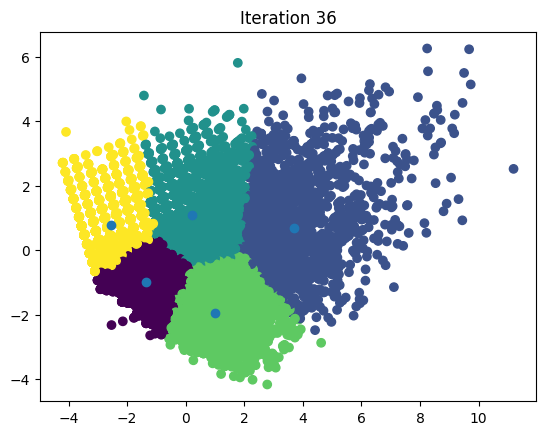

In [15]:
max_iterations = 100
centroid_count = 5

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

The higher the number of clusters , the longer its going to take to iterate.

In [ ]:
centroids

,0,1,2,3,4
overall,4.297527,2.503630,6.408518,5.242940,4.120966
potential,5.957096,4.426235,6.675748,4.863333,4.144551
value_eur,1.063624,1.013478,1.418651,1.055599,1.030817
wage_eur,1.073072,1.015957,1.642677,1.168189,1.052085
age,2.595539,2.296697,4.098559,6.117002,4.428609


from matplotlib import pyplot as plt
centroids[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
centroids[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
centroids[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
centroids[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
centroids.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
centroids.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
centroids.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
centroids.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
centroids[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
centroids[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
centroids[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
centroids[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

For cluster 0, players are young-mid young(age rating is 2.5), and they have a growing potential,
For Cluster 1, players are young(2.2 age rating), potential still growing.
For cluster 2, players are mid age(30-40), their overal rating is high and they also have a huge potential.
For cluster 3, these are the star players,they have a higehr rating too and their potential is also growing.

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=centroids)

https://docs.google.com/spreadsheets/d/1PXKDVxpbXxpZXebI3RU5zRUS2OODZQfBF-pPO_kLBzA/edit#gid=0
